# Curse of Dimensionality

* The number of points needed to densely populate a space grows quickly with dimensionality. If you add informative, discriminating features - more features can be helpful - but you will need more and more points to fully understand the space.

* Things do not always behave as you would expect in high dimensions - this is part of the Curse of Dimensionality. 

## Unit Porcupine:  The unit hyper-sphere inscribed within the unit hyper-cube.

* Consider a sphere with radius $r$ in $D$ dimensions
\begin{equation}
S = \left\{ \mathbf{x} \left| \sum_{i=1}^D x_i^2 \le r^2 \right. \right\} \nonumber
\end{equation}
It's volume is: 
\begin{equation}
v_D(r) = \frac{r^D \pi^{\frac{D}{2}}}{\Gamma(\frac{d}{2} + 1)} \nonumber
\end{equation}
where $\Gamma(n) = \int_0^\infty e^{-x}x^{n-1}dx$.

  So, for $D = 1$: $v_1(r) = \frac{r \pi^{1/2}}{\Gamma(1/2 + 1)} = 2r$ 
  
  $D = 2$: $v_2(r) = \frac{r^2 \pi}{\Gamma(2)} = \pi r^2$
  
   $D = 3$: $v_3(r) = \frac{r^2 \pi^{3/2}}{\Gamma(3/2 + 1)} = \frac{4}{3}\pi r^3$
    
* Consider a hypercube with radius $r$.  It's volume is $(2r)^D$.

So, for $D = 1$: $v_{1,c} = 2r$ 

$D = 2$: $v_{2,c} = 4r^2$ 

$D = 3$: $v_{3,c} = 8r^3$ 
* Take the case where the hyper-sphere is inscribed within the unit hyper-cube.  What happens to the relative volume of the sphere and cube as $D$ increases? 


\begin{eqnarray}
\frac{Vol(Sphere)}{Vol(Cube)} &=& \frac{r^D\pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2} +1)(2r)^D}\\ \nonumber
&=& \frac{\pi^{\frac{D}{2}}}{2^D\Gamma(\frac{D}{2} + 1)}
\end{eqnarray}
Note: The $r$ dropped out, relative volume depends only on dimension. 

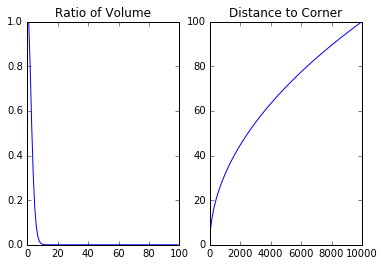

In [1]:
#Import needed python libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import math 

#The Unit Porcupine Plot
#The unit hyper-sphere inscribed within the unit hyper-cube.

fig = plt.figure()
d = range(1,100)
V = [math.pi**(i/2)/(2**i*math.gamma(i/2 + 1)) for i in d]
ax = fig.add_subplot(*[1,2,1])
ax.plot(d, V) 
ax.set_title('Ratio of Volume')

dCorner = [math.sqrt(d) for d in range(1,10000)]
ax = fig.add_subplot(*[1,2,2])
ax.plot(range(1,10000), dCorner) 
ax.set_title('Distance to Corner')

plt.show();

## Volume of space between two spheres with slightly different radii in high dimensions

* $Vol_{crust} = Vol_{S_1} - Vol_{S_2}$ where radius of $S_1$ is greater than the radius of $S_2$
\begin{eqnarray}
Vol_{crust} &=& Vol_{S_1} - Vol_{S_2} \nonumber\\
&=& \left[ 1 - \frac{Vol_{S_2}}{Vol_{S_1}}\right]Vol_{S_1} \nonumber \\
&=& \left[ 1 - \frac{\frac{(a - \epsilon)^D \pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2}+1)}}{\frac{a^D \pi^{\frac{D}{2}}}{\Gamma(\frac{D}{2}+1)}}\right]Vol_{S_1} \nonumber \\
&=& \left[ 1 - \frac{a^D ( 1 - \frac{\epsilon}{a})^D}{a^D}\right]Vol_{S_1}   \nonumber \\
&=&  \left[ 1 - \left( 1 - \frac{\epsilon}{a}\right)^D \right]Vol_{S_1}\nonumber 
\end{eqnarray}

* What happens as $D$ increases?  


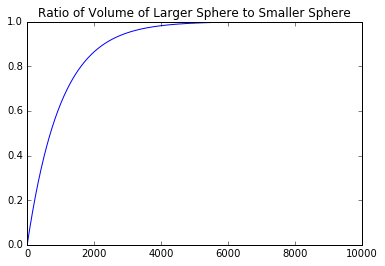

In [2]:
#Crust volume between spheres with epsilon different radii and increasing dimensionality
a = 1
eps = 0.001
D = np.arange(1,10000)
RatioVol = [1-(1-eps/a)**d for d in D]
fig = plt.figure()
plt.plot(D, RatioVol)
plt.title('Ratio of Volume of Larger Sphere to Smaller Sphere')
plt.show() 

## Radius needed to cover the same percentage volume with growing dimensionality:  

* Volume of unit line, square, cube, hyper-cube:  $s^D = 1^D$
* Side of a cube covering some percentage of the area: say, 10\% would be $r^D = 1/10$, $r = (1/10)^{(1/D)}$
* What happens as D increases? 


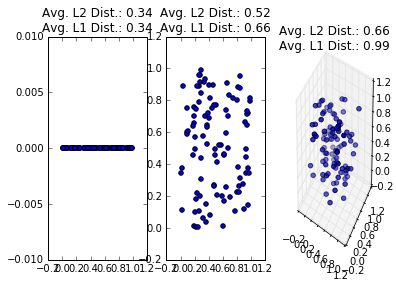

In [4]:
'''Illustrate that average distance between uniform random points increases when dimensionality
increases and number of data points held constant. Illustrates that you need more and more
points to characterize the unit cube as you go up in dimensionality.'''

from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as sc 
import textwrap

N = 100

x1 = np.random.uniform(0,1,(N,1)) #generate N uniform random data points in the unit interval
x2 = np.random.uniform(0,1,(N,2)) #generate N uniform random data points in the unit square
x3 = np.random.uniform(0,1,(N,3)) #generate N uniform random data points in the unit cube
y1 = np.mean(sc.pdist(x1, 'euclidean')) #compute avg euclidean distance between points
y2 = np.mean(sc.pdist(x2, 'euclidean'))
y3 = np.mean(sc.pdist(x3, 'euclidean'))
z1 = np.mean(sc.pdist(x1, 'cityblock')) #compute l1 distance between points
z2 = np.mean(sc.pdist(x2, 'cityblock'))
z3 = np.mean(sc.pdist(x3, 'cityblock'))

#plot results
fig = plt.figure()
ax = fig.add_subplot(*[1,3,1])
ax.scatter(x1, np.zeros((N,1)))
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y1) + ' Avg. L1 Dist.: ' + str("%.2f"%z1);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[1,3,2])
ax.scatter(x2[:,0], x2[:,1]) 
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y2) + ' Avg. L1 Dist.: ' + str("%.2f"%z2);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))

ax = fig.add_subplot(*[1,3,3], projection='3d')
ax.scatter(x3[:,0], x3[:,1], x3[:,2]) 
myTitle = 'Avg. L2 Dist.: ' + str("%.2f"%y3) + ' Avg. L1 Dist.: ' + str("%.2f"%z3);
ax.set_title("\n".join(textwrap.wrap(myTitle, 20)))
plt.show();

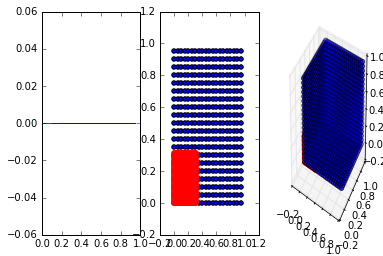

In [5]:
#Percentage Volume Illustration (p=.1)

p = 0.1
fig = plt.figure()
x = np.arange(0,1,.05)

# 1D 
ax = fig.add_subplot(*[1,3,1])
ax.plot(x, np.zeros(x.size))
z = np.arange(0,p,.01)
ax.plot(z, np.zeros(z.size), 'r')

# 2D 
ax = fig.add_subplot(*[1,3,2])
[xx,yy] = np.meshgrid(x,x)
z = np.arange(0,math.sqrt(p),0.01)
[zx,zy] = np.meshgrid(z,z)
ax.scatter(xx, yy)
ax.scatter(zx, zy, color='red')

# 3D 
ax = fig.add_subplot(*[1,3,3], projection='3d')
[xx,yy,zz] = np.meshgrid(x,x,x)
z = np.arange(0,math.sqrt(p),0.01)
[zx,zy,zz2] = np.meshgrid(z,z,z)
ax.scatter(xx, yy, zz)
ax.scatter(zx, zy, zz2, color='red')
plt.show()

# Principal Components Analysis


* So, a major take away from the Curse of Dimensionality discussion is that when we are in high dimensional spaces, much of the space is empty and the data lives at the surface.  Given this, it makes sense to use a lower-dimensional *manifold* representation of the data.  

* A very common approach (and on of the simplest approaches) to dimensionality reduction is  Principal Components Analysis (PCA).  PCA  takes data from sensor coordinates to data centric coordinates using linear projections (i.e., it is assuming that the informative components of the data lies on a linear manifold.) 

* PCA uses a linear transformation to minimize the redundancy of the resulting transformed data (by ending up with data that is uncorrelated).

* PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. 

* Without loss of generality, let's assume the input data has zero mean. 
\begin{equation}
\mathbf{y} = \mathbf{A}\mathbf{x}
\end{equation}

The correlation matrix of $\mathbf{y}$ is: 
\begin{eqnarray}
R_y &=& E[\mathbf{y}\mathbf{y}^T]\\
&=& E[\mathbf{A}\mathbf{x}\mathbf{x}^T\mathbf{A}^T]\\
&=&\mathbf{A}R_x\mathbf{A}^T
\end{eqnarray}

 If we are given $N$ data vectors, $\{ \mathbf{x}_1, \ldots, \mathbf{x}_N \}$, we can estimate $R_x$ as 
 \begin{equation}
 R_x \approx \frac{1}{n} \sum_{k=1}^n \mathbf{x}_k \mathbf{x}_k^T
 \end{equation}
 * This is a symmetric matrix, so, it's eigenvectors are mutually orthogonal. 
 * So, if we choose $\mathbf{A}$ to have columns equal to the orthonomal eigenvectors of $R_x$, the $R_y$ is diagonal.  
 \begin{eqnarray}
 \mathbf{R}_y = \left[ \begin{array}{c} \mathbf{e_1}^T \\ \mathbf{e_2}^T \\ \vdots \\ \mathbf{e_D}^T\end{array}\right]\mathbf{R}_x\left[ \mathbf{e}_1, \mathbf{e}_2, \ldots, \mathbf{e}_D \right] & = & \left[ \begin{array}{c c c c}\mathbf{e}_1^T\mathbf{R}_x\mathbf{e}_1 & \mathbf{e}_1^T\mathbf{R}_x\mathbf{e}_2 & \ldots & \mathbf{e}_1^T\mathbf{R}_x\mathbf{e}_D \\ \mathbf{e}_2^T\mathbf{R}_x\mathbf{e}_1 & \mathbf{e}_2^T\mathbf{R}_x\mathbf{e}_2 & \ldots & \mathbf{e}_2^T\mathbf{R}_x\mathbf{e}_D \\ \vdots & & \ddots & \vdots \\ \mathbf{e}_D^T\mathbf{R}_x\mathbf{e}_1 & \mathbf{e}_D^T\mathbf{R}_x\mathbf{e}_D & \ldots & \mathbf{e}_D^T\mathbf{R}_x\mathbf{e}_D \end{array}\right]\\
 & = & \left[ \begin{array}{c c c c} \lambda_1 & 0 & \cdots & 0 \\ 0 & \lambda_2 & \cdots & 0 \\ \vdots & & \ddots & \\ 0 & 0 & \cdots & \lambda_D \end{array}\right]
\end{eqnarray}
where $\mathbf{e}_i \in \mathbb{R}^{D\times1}$ and $\mathbf{R}_x \in \mathbb{R}^{D\times D}$. 

* Note: Given that $\mathbf{e}_i$ is an eigenvector of $\mathbf{R}_x$, we know that $\lambda_i\mathbf{e}_i = \mathbf{R}_x\mathbf{e}_i$.  So, $\mathbf{e}_i^T\mathbf{R}_x\mathbf{e}_i = \mathbf{e}_i^T\left( \lambda_i \mathbf{e}_i \right) = \lambda_i$ using the fact that $\mathbf{e}_i$ is normalized (i.e., $\left\|\mathbf{e}_i\right\|_2^2$ = 1)

* Similarly, Given that $\mathbf{e}_i$ and $\mathbf{e}_j$ are orthogonal eigenvectors of $\mathbf{R}_x$, we know that $\lambda_i\mathbf{e}_i = \mathbf{R}_x\mathbf{e}_i$.  So, $\mathbf{e}_j^T\mathbf{R}_x\mathbf{e}_i = \mathbf{e}_j^T\left( \lambda_i \mathbf{e}_i \right) = 0$


## Given a symmetric matrix, the eigenvectors of distinct eigenvalues are orthogonal:

Let $\mathbf{A}$ be an $l\times l$ symmetric matrix, $\mathbf{A}^T = \mathbf{A}$.  Then the eigenvectors corresponding to distinct eigenvalues are orthogonal.  Let $\lambda_i \ne \lambda_j$ be two such eigenvalues.  The the definitions we have:
 \begin{eqnarray}
 \mathbf{A} \mathbf{v}_i = \lambda_i\mathbf{v}_i \\
 \mathbf{A} \mathbf{v}_j = \lambda_j\mathbf{v}_j 
 \end{eqnarray}
 
 By multiplying the first eigenvalue equation on the left by $\mathbf{v}_j^T$ and by the transpose of the second equation on the right by $\mathbf{v}_i$, we get: 
\begin{eqnarray}
  \mathbf{v}_j^T \mathbf{A} \mathbf{v}_i =  \mathbf{v}_j^T \lambda_i\mathbf{v}_i \\
 \left(\mathbf{A} \mathbf{v}_j\right)^T\mathbf{v}_i = \left(\lambda_j\mathbf{v}_j\right)^T\mathbf{v}_i\\
   \mathbf{v}_j^T\mathbf{A}\mathbf{v}_i = \lambda_j\mathbf{v}_j^T\mathbf{v}_i\\
   \mathbf{v}_j^T \mathbf{A} \mathbf{v}_i - \mathbf{v}_j^T \mathbf{A} \mathbf{v}_i = 0 = \left(\lambda_i - \lambda_j\right)\mathbf{v}_j^T\mathbf{v}_i
\end{eqnarray}

Thus, $\mathbf{v}_j^T\mathbf{v}_i = 0$. 

* The eigenvecotrs can be interpreted as an orthogonal axis defined by the data. It makes sense to use these to look for data-centric coordinates/subspaces if the data projects differently to each axis. Since all data is noisy, we can concentrate on the axes corresponding to the largest eigenvectors if you are interested in preserving the variance of the data.  However, when using PCA within a classification problem, it is much more difficult because we are interested in discriminability (not necessarily variance).


## Principal Components Analysis - Maximal Variance Formulation

* PCA is a linear transformation
* PCA minimizes the redundancy of the resulting transformed data (by ending up data that is uncorrelated), minimizes the mean squared error between original and transformed/reduced data, and maximizes the retained variance of the data. 

* Consider a data set of observations $\left\{ \mathbf{x}_n \right\}_{n=1}^N$ and $\mathbf{x}_n \in \mathbb{R}^D$. We want to maximize the variance of the projected data. 

* Let us first consider reducing dimensionality to $M = 1$.  Let us define the projection as a vector $\mathbf{u}_1$ where $\mathbf{u}_1^T\mathbf{u}_1 = 1$.  Then, each projected data point into 1-D would be $y_n = \mathbf{u}_1^T\mathbf{x}_n$

* The mean of the sample data is $\bar{\mathbf{x}} = \frac{1}{N}\sum_{n=1}^N\mathbf{x}_n$ and the mean of the projected data is $\mathbf{u}_1^T\bar{\mathbf{x}}$

* The variance of projected data is: 
\begin{eqnarray}
\frac{1}{N} \sum_{n=1}^N \left\{ \mathbf{u}_1^T\mathbf{x}_n - \mathbf{u}_1^T\bar{\mathbf{x}} \right\}^2 & = & \frac{1}{N} \sum_{n=1}^N  \left( \mathbf{u}_1^T\mathbf{x}_n - \mathbf{u}_1^T\bar{\mathbf{x}} \right)\left( \mathbf{u}_1^T\mathbf{x}_n - \mathbf{u}_1^T\bar{\mathbf{x}} \right)^T\\
& = & \frac{1}{N} \sum_{n=1}^N  \left( \mathbf{u}_1^T\mathbf{x}_n - \mathbf{u}_1^T\bar{\mathbf{x}} \right) \left( \mathbf{x}_n^T\mathbf{u}_1 - \bar{\mathbf{x}}^T\mathbf{u}_1 \right)\\
& = & \frac{1}{N} \sum_{n=1}^N  \mathbf{u}_1^T\mathbf{x}_n\mathbf{x}_n^T\mathbf{u}_1 - \mathbf{u}_1^T\mathbf{x}_n\bar{\mathbf{x}}^T\mathbf{u}_1 - \mathbf{u}_1^T\bar{\mathbf{x}}\mathbf{x}_n^T\mathbf{u}_1 + \mathbf{u}_1^T\bar{\mathbf{x}}\bar{\mathbf{x}}^T\mathbf{u}_1\\
& = & \mathbf{u}_1^T \left( \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n\mathbf{x}_n^T - \mathbf{x}_n\bar{\mathbf{x}}^T - \bar{\mathbf{x}}\mathbf{x}_n^T+ \bar{\mathbf{x}}\bar{\mathbf{x}}^T\right)\mathbf{u}_1\\
& = & \mathbf{u}_1^T  \left( \frac{1}{N} \sum_{n=1}^N  \left(\mathbf{x}_n - \bar{\mathbf{x}}\right)\left(\mathbf{x}_n - \bar{\mathbf{x}}\right)^T \right) \mathbf{u}_1\\
& = & \mathbf{u}_1^T\mathbf{S}\mathbf{u_1}
\end{eqnarray}

* Now, we can maximize the projected variance with respect to $\mathbf{u}_1$ while constraining $\mathbf{u}_1^T\mathbf{u}_1 = 1$.  We will do this using a Lagrange multiplier: 
\begin{equation}
L = \mathbf{u}_1^T\mathbf{S}\mathbf{u_1} + \lambda_1\left(1 - \mathbf{u}_1^T\mathbf{u}\right)
\end{equation}

* By taking the derivative of the Lagrangian and setting it equal to zero, we get: 
\begin{equation}
\mathbf{S}\mathbf{u}_1 = \lambda_1\mathbf{u_1}
\end{equation}

* We can left multiply by $\mathbf{u}_1^T$ and get:
	\begin{equation}
	\mathbf{u_1}^T\mathbf{S}\mathbf{u_1} = \lambda_1
	\end{equation}

* So the variance of the projected data is equal to the eigenvalue of the covariance matrix of the sample data along the direction of the eigenvector used for dimensionality reduction. 
* We can incrementally add new eigenvector directions (ordered by maximal eigenvalue/variance) to project into an $M$ dimensional space where $1\leq M \leq D$


## PCA for Minimization of Mean Squared Error

* We can also look at PCA as a minimization of mean squared error.  
* Consider $\mathbf{x}\in R^n$ and an orthogonal basis $\mathbf{a}$:

 \begin{equation}
 \hat{\mathbf{x}} = \sum_{i=1}^m y_i\mathbf{a}_i
 \end{equation}
 where $m < n$.  
 \begin{equation}
 y_j = \mathbf{x}^T\mathbf{a}_j
 \end{equation} where $\mathbf{A}^T\mathbf{A}=\mathbf{I}$

We want to minimize the residual error: 
\begin{equation}
\epsilon = \mathbf{x} - \hat{\mathbf{x}} = \sum_{j=m+1}^n y_j \mathbf{a}_j
\end{equation}
The objective we will used is the mean square residual:
\begin{eqnarray}
J &=& E\{ \|\epsilon\|^2_2\}\\
&=& E\left\{\left( \sum_{i=m+1}^n y_i \mathbf{a}_i^T\right)\left( \sum_{i=m+1}^n y_i \mathbf{a}_i\right) \right\}\\
&=&\sum_{j=m+1}^n E \{y_j^2\}\\
&=&\sum_{j=m+1}^n E \{(\mathbf{a}_j^T\mathbf{x})(\mathbf{x}^T\mathbf{a}_j)\}\\
&=& \sum_{j=m+1}^n \mathbf{a}_j^T E\{\mathbf{x}\mathbf{x}^T\}\mathbf{a}_j\\
&=& \sum_{j=m+1}^n \mathbf{a}_j^T R_x\mathbf{a}_j
\end{eqnarray}
Minimize the error and incorporate Lagrange parameters for $\mathbf{A}^T\mathbf{A}=\mathbf{I}$:
\begin{eqnarray}
\frac{\partial J}{\partial \mathbf{a}_j} &=& 2(R_x\mathbf{a}_j - \lambda_j\mathbf{a}_j) = 0 \text{ for }j = m+1 \ldots n\\
R_x\mathbf{a}_j &=& \lambda_j\mathbf{a}_j
\end{eqnarray}
So, the sum of the error is the sum of the eigenvalues of the unused eigenvectors.  So, we want to select the eigenvectors with the $m$ largest values. 


## Reading Assignment

* Section 1.4 
* Section 12.1